In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('add.csv')

In [3]:
data.head()

,x,y,sum
0,1.0,1.0,2.0
1,4.0,4.0,8.0
2,6.0,6.0,12.0
3,10.0,10.0,20.0
4,30.0,30.0,60.0


In [4]:
import matplotlib.pyplot as plt

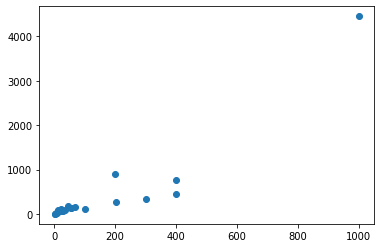

In [5]:
plt.scatter(data['x'],data['sum'])

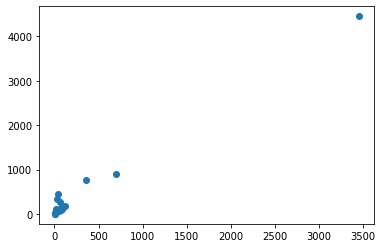

In [6]:
plt.scatter(data['y'],data['sum'])

### 1. Store Feature Matrix In X And Response (Target) In Vector y 

In [7]:
X  = data[['x','y']]
y= data['sum']

### 2. Train/Test Split
#### 1. Split data into two part : a training set and a testing set
#### 2. Train the model on training set
#### 3. Test the Model on testing set

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33,random_state=42)

In [9]:
X_train

,x,y
3,10.0,10.0
4,30.0,30.0
17,400.0,45.7
12,12.5,56.7
18,34.6,56.9
16,203.6,67.9
2,6.0,6.0
9,56.0,78.0
21,1000.0,3456.0
7,100.0,22.0


### 3. Import & Train The Model

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### 4. Check Model’s Prediction Performance

In [12]:
model.score(X_train,y_train)

1.0

In [13]:
model.score(X_test,y_test)

1.0

### 5. Comparing The Results

In [14]:
y_pred = model.predict(X_test)

In [15]:
y_pred

array([  2. , 112.9,  68. ,   8. , 900. ,  66. , 169.4, 334. ])

In [16]:
y_test

0       2.0
13    112.9
8      68.0
1       8.0
15    900.0
5      66.0
20    169.4
11    334.0
Name: sum, dtype: float64

In [17]:
df = pd.DataFrame({'Actual':y_test,'Prediction':y_pred})
df

,Actual,Prediction
0,2.0,2.0
13,112.9,112.9
8,68.0,68.0
1,8.0,8.0
15,900.0,900.0
5,66.0,66.0
20,169.4,169.4
11,334.0,334.0


### 6. Prediction  

In [18]:
model.predict([[10,20]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([30.])

In [19]:
model.predict([[100.2,210.3]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([310.5])

### 7. Save Model Usign Joblib

In [20]:
import joblib

In [21]:
joblib.dump(model,'model_joblib')

['model_joblib']

In [22]:
model = joblib.load('model_joblib')

In [23]:
model.predict([[10,40]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([50.])

### GUI

In [24]:
X  = data[['x','y']]
y= data['sum']

In [25]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [26]:
import joblib
joblib.dump(model,'model_joblib')

['model_joblib']

In [27]:
model = joblib.load('model_joblib')

In [28]:
model.predict([[10,40]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([50.])

In [29]:
from tkinter import *
import joblib

In [30]:
def show_entry_fields():
    p1 = float(e1.get())
    p2 = float(e2.get())
    
    model = joblib.load('model_joblib')
    result = model.predict([[p1,p2]])
    
    Label(master,text='Sum is = ').grid(row=4)
    Label(master,text=result).grid(row=5)
    print("Sum is",result)

master = Tk()
master.title("Addition of two numbers using ML")

label = Label(master, text = "Addition of two numbers using ML",
             bg = 'black',fg='white').grid(row=0,columnspan=2)

Label(master,text ="Enter First Number").grid(row=1)
Label(master,text ="Enter Second Number").grid(row=2)

e1 =Entry(master)
e2= Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)

Button(master,text='Predict',command=show_entry_fields).grid()

mainloop()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


Sum is [8.]
